# 快速上手RoboMaster EP机器人

## 0. 连接RoboMaster EP机器人

执行下面的代码,可以创建RoboMaster EP机器人的实例对象`robot`, 

接口提供了根据不同连接类型`connection_type`连接RoboMaster EP机器人，

- `ConnectionType.USB_DIRECT`: 

    USB直连模式，通过USB线连接EP机器人与电脑

- `ConnectionType.WIFI_DIRECT`： 

    WIFI直连模式，切换EP机器人到直连模式，电脑连接EP机器人的WIFI（例如RMEP-xxxxxx）:
    
    <div align=center>
    <img src='pics/docs_images_direct_connection_change.png'>
    </div>
    
    直连模式下的联网拓扑: 
    
    <div align=center>
    <img src='pics/docs_images_wifi_direct.png'>
    </div>
    
- `ConnectionType.WIFI_NETWORKING`：

    WIFI路由模式，切换EP机器人到路由模式，连接EP机器人和PC到同一个网域的路由器上，同时需要手动输入`robot_ip`字段:
    
    <div align=center>
    <img src='pics/docs_images_networking_connection_key.png'>
    </div>
    
    路由模式下的联网拓扑:
    
    <div align=center>
    <img src='pics/docs_images_wifi_sta.png'>
    </div>

执行成功后,可以看到

> RoboMaster EP机器人连接成功
>
> 机器人IP地址: xxx.xxx.xxx.xxx
>
> 当前设备IP地址: xxx.xxx.xxx.xxx
>
> 启动SDK： 成功

说明已经连接成功,并开启了SDK模式

In [1]:
from robomaster_jupyter import Robot
from robomaster.connection import ConnectionType
robot = Robot(connection_type=ConnectionType.WIFI_DIRECT)
# robot = Robot(connection_type=ConnectionType.USB_DIRECT)
# robot = Robot(connection_type=ConnectionType.WIFI_NETWORKING,
#               robot_ip='192.168.0.2')

RoboMaster EP机器人连接成功
机器人IP地址: 192.168.2.1
当前设备IP地址: 192.168.2.21
启动SDK： 成功


## 1. 摄像头

调用`robot`对象中`camera`子对象是摄像头对象

调用`open(height,width)`函数，连接并获取摄像头的图像数据

其中`width`和`height`代表获取图像的宽和高，最大宽x高是1280x720

In [2]:
robot.camera.open(width=640, height=360)

连接相机模块： 成功


`image`变量是摄像头的图像数据，由三维数组构成（高，宽，BGR色彩）

In [3]:
print('图像的数据类型：{}'.format(type(robot.camera.image)))
print('图像的数据大小：{}'.format(robot.camera.image.shape))

图像的数据类型：<class 'numpy.ndarray'>
图像的数据大小：(360, 640, 3)


调用`enable_display()`开启显示视频流图像的控件

In [4]:
robot.camera.enable_display()

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

调用`disable_display()`关闭显示视频流图像的控件

In [5]:
robot.camera.disable_display()

## 2. 麦克风

调用`robot`对象中`microphone`子对象是麦克风对象

调用`open(sample_rate)`函数，连接并获取麦克风的音频数据

其中`sample_rate`代表获取音频的采样率，最大是48000

In [6]:
robot.microphone.open(sample_rate=48000)

连接音频模块: 成功


`audio`变量是麦克风的音频数据，类型是`bytes`

例如：采样率默认是48000，单次接收是20ms的音频数据，位宽是16Bit(2 Byte)

可以计算出每帧接收的大小是 

> 48000/(1000ms/20ms)*(2 Byte)=1920 Byte

In [7]:
print('音频的数据类型：{}'.format(type(robot.microphone.audio)))
print('音频的数据大小：{} Byte'.format(len(robot.microphone.audio)))

音频的数据类型：<class 'bytes'>
音频的数据大小：1920 Byte


调用`play()`开启播放音频的控件

In [8]:
robot.microphone.play()

调用`stop_play()`停止播放音频的控件

In [9]:
robot.microphone.stop_play()

调用`record(duration)`来录制时间长度为`duration`秒的音频，并且显示音频图和播放控件,返回值是numpy.array类型的音频数组

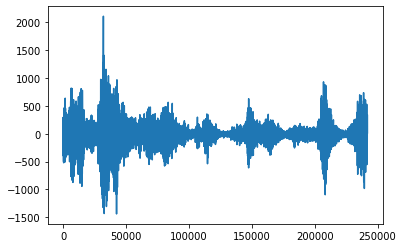

In [10]:
record_audio = robot.microphone.record(duration=5)

## 3. LED灯条
`robot`对象中的`led`子对象是LED灯条对象

更改`color`变量的值：（R，G，B）可以更改灯条的颜色

In [11]:
# 更改灯条为红色  R =255, G = 0, B = 0
print('LED颜色的数据类型：{}'.format(type(robot.led.color)))
robot.led.color = (255,0,0)

LED颜色的数据类型：<class 'tuple'>


调用`enable_color_picker`函数来开启调色盘控件，选取不同的颜色来改变灯条颜色

In [12]:
robot.led.enable_color_picker()

ColorPicker(value='red', description='选择颜色')

调用`disable_color_picker`函数来关闭调色盘控件

In [13]:
robot.led.disable_color_picker()

## 4. 底盘模块

`robot`对象中的`chassis`子对象是底盘

改变底盘`chassis`的`speed`速度变量来控制底盘进行不同速度的运动
其中

- x代表前后方向（向前为正方向）
- y代表左右方向（向右为正方向）
- w代表旋转方向（顺时针方向为正方向）

单位为m/s ，°/s

In [14]:
# 0.2m/s向前移动
robot.chassis.speed.x = 0.2
robot.chassis.speed.y = 0
robot.chassis.speed.w = 0

对`speed`速度调用`reset`函数来将速度重置为0

In [15]:
robot.chassis.speed.reset()

## 5. 云台模块

`robot`对象中的`gimbal`子对象是云台对象
改变云台`gimbal`的`speed`速度变量来控制云台进行不同速度的运动
其中

- pitch代表俯仰方向（上仰为正方向）
- yaw代表偏航（右偏为正方向）

单位为°/s

In [16]:
# 10°/s向右扭动云台
robot.gimbal.speed.pitch = 0
robot.gimbal.speed.yaw = 10

对`speed`速度调用`reset`函数来将速度重置为0

In [17]:
robot.gimbal.speed.reset()

## 6. 水弹发射模块

`robot`对象中的`blaster`子对象是发射机构对象
改变发射机构`blaster`的`fire`发射变量来控制水弹发射机构单次发射水弹水弹

In [18]:
robot.blaster.fire = True

## 7. 遥控器测试控件

提供了遥控器空间来控制机器人的底盘、云台和发射机构
`robot`对象调用`enable_controller()`开启遥控器空间

In [19]:
robot.enable_controller()

Controller()

调用`enable_controller()`开启遥控器控件

In [20]:
robot.disable_controller()

退出遥控器控制模式


## 8.断开机器人连接

`robot`机器人对象调用`Close()`函数来正常关闭与机器人的连接

In [21]:
robot.close()

相机连接断开
麦克风连接断开
机器人连接断开
